In [24]:
##Code inspired from https://www.kaggle.com/code/ahmedkhairullah/animal-image-classification by Ahmed Khairullah
#Our classifires only uses 5 of the classes for the sake of simplicity, and time constraints
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
     

In [12]:
IMAGE_SIZE = [224 , 224]

In [13]:
#Finished model imported from Keras, however not trained yet
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

In [14]:
#Data gotten from https://www.kaggle.com/datasets/utkarshsaxenadn/animal-image-classification-dataset/data
train_diretory = './Data/Training Data modified/Training Data modified/'
test_diretory = './Data/Testing Data modified/Testing Data modified/'
val_diretory = './Data/Validation Data modified/Vaildation Data modified/'

In [15]:
folders = glob('./Data/Training Data modified/Training Data modified/*')
len_folders = len(folders)

In [16]:
#Adding the prediction layer, where the output is the number of classes
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [17]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
train_datagen =   ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_diretory,
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle=True,
                                                    )

test_set = test_datagen.flow_from_directory(test_diretory, 
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 10000 images belonging to 5 classes.
2
Found 859 images belonging to 5 classes.


In [49]:
x = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
    )

model.save('model.h5')

Epoch 1/8
  2/313 [..............................] - ETA: 10:35 - loss: 0.4734 - accuracy: 0.7969

KeyboardInterrupt: 

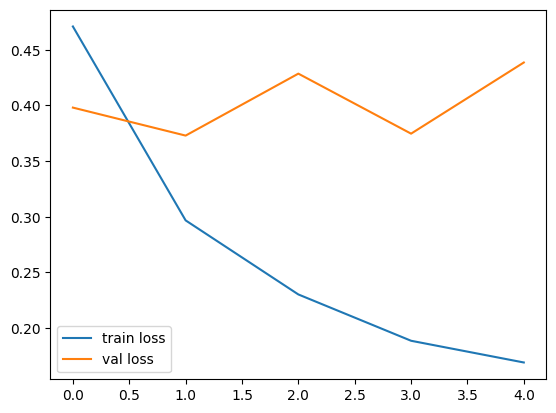

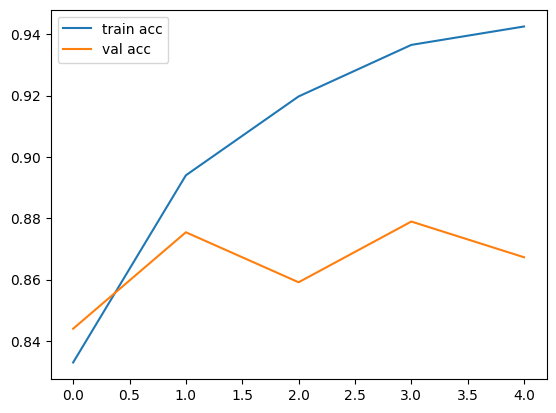

In [ ]:
# loss
plt.plot(x.history['loss'], label='train loss')
plt.plot(x.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(x.history['accuracy'], label='train acc')
plt.plot(x.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [30]:
model_animals = load_model('model.h5')

animals_classes = training_set.class_indices
classes = {x: y for y, x in animals_classes.items()}
print(classes)

{0: 'Beetle', 1: 'Butterfly', 2: 'Cat', 3: 'Cow', 4: 'Dog'}


In [31]:
def predict(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model_animals.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = classes[y]
    return res

1/1 [==============================] - 0s 100ms/step
Beetle


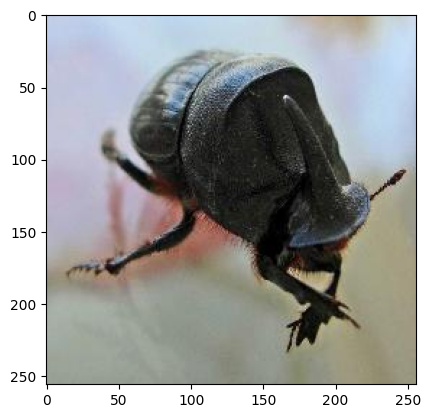

1/1 [==============================] - 0s 109ms/step
Cat


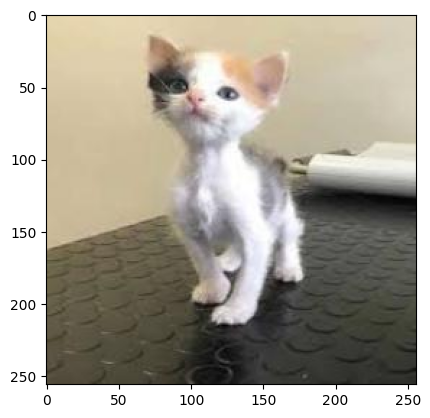

1/1 [==============================] - 0s 104ms/step
Butterfly


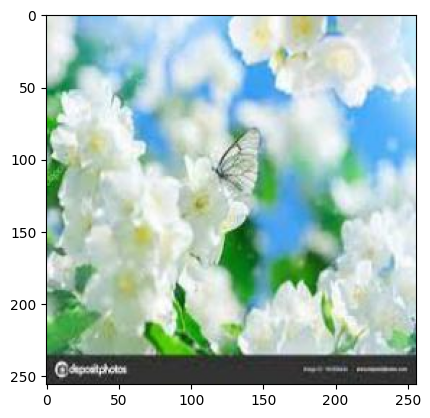

1/1 [==============================] - 0s 98ms/step
Cat


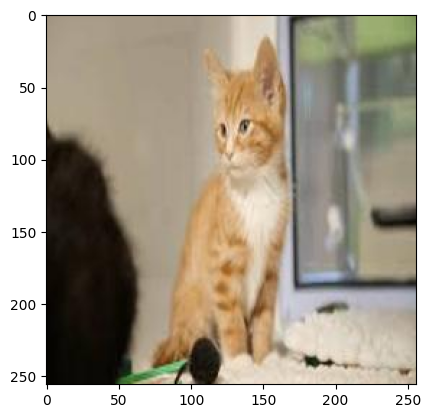

1/1 [==============================] - 0s 127ms/step
Cat


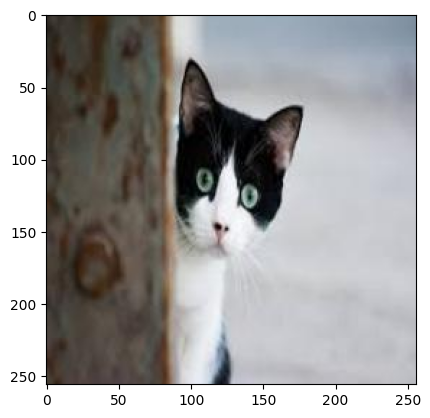

1/1 [==============================] - 0s 111ms/step
Butterfly


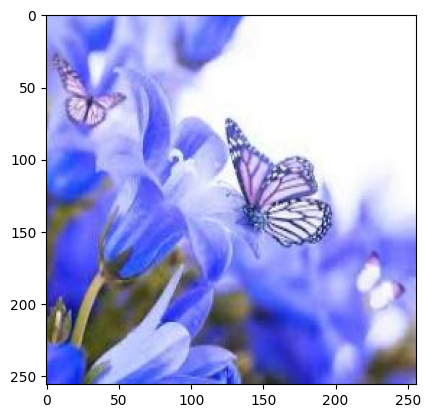

1/1 [==============================] - 0s 154ms/step
Cat


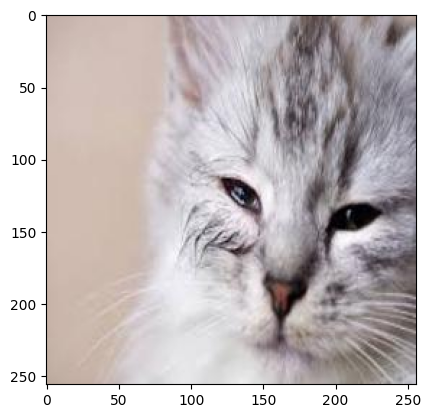

1/1 [==============================] - 0s 98ms/step
Beetle


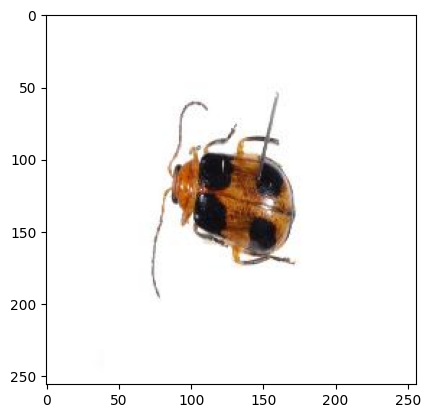

1/1 [==============================] - 0s 107ms/step
Cat


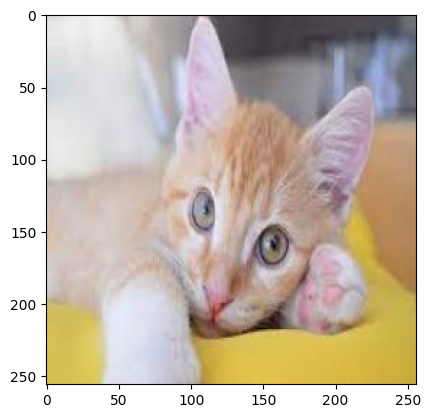

1/1 [==============================] - 0s 101ms/step
Cat


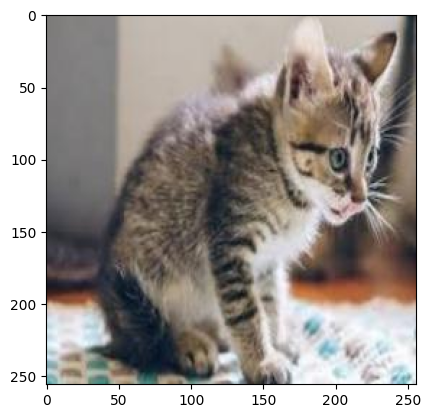

In [48]:
#predict 10 random images from test set
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

test_dir = './Data/Testing Data modified/Testing Data modified/'
test_files = os.listdir(test_dir)
test_imgs = [os.path.join(test_dir, f) for f in test_files]
test_imgs = glob('./Data/Testing Data modified/Testing Data modified/*/*')

for i in range(10):
    path = random.choice(test_imgs)
    pic = mpimg.imread(path)
    prediction = predict(path)
    print(prediction)
    plt.imshow(pic)
    plt.show()




